In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Note: this block is copied from predictor.py

# open cleaned/binned data
data = pd.read_csv('../uber_lyft_preference.csv')

# map locations to integer values
location_map = {
    "Haymarket Square": 0,
    "Back Bay": 1,
    "North End": 2,
    "North Station": 3,
    "Beacon Hill": 4,
    "Fenway": 5,
    "Boston University": 6,
    "South Station": 7,
    "Theatre District": 8,
    "West End": 9,
    "Financial District": 10,
    "Northeastern University": 11
}
data['source'] = data['source'].map(location_map)
data['destination'] = data['destination'].map(location_map)

# map product type to integers
product_map = {
    "shared": 1,
    "standard": 2,
    "xl": 3,
    "black_xl": 4,
    "lux": 5,
}
data['type'] = data['type'].map(product_map)

# map cab type to integers
cab_type_map = {
    "Lyft": 0,
    "Uber": 1
}
data['preferred'] = data['preferred'].map(cab_type_map)

In [17]:
# remove avg price for lyft and uber since we did not use them in training
data = data[['day_of_week', 'hour', 'source', 'destination', 'type', 'avg_distance', 'preferred']]

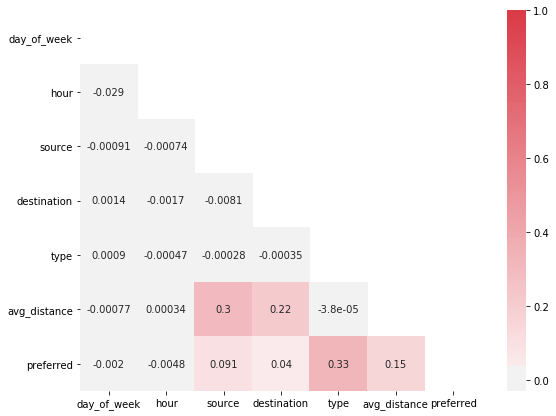

In [25]:
# plot a correlation heatmap to visualize the relationship between features and target
correlation = data.corr()

#create a mask to hide the upper right triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (9,7))
color_map = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(correlation, mask=mask, cmap=color_map, annot=True, center=0)

heatmap.get_figure().savefig("heatmap.png")